# PRML Lab 10

    Ayush Abrol B20AI052

---

## Question 1

### Reading Data and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('spambase.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
headers = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

In [ ]:
df.columns = headers
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
values, counts = np.unique(df['spam'], return_counts=True)
print(values, counts)
print("Here 1 represents Spam and 0 represents Non-Spam mails")

[0 1] [2788 1813]
Here 1 represents Spam and 0 represents Non-Spam mails


### Normalizing the data

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=headers[:-1])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672880,-0.165072,0.673183,-0.0469,-0.464314,0.781971,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110
4597,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165
4598,0.640128,-0.165072,0.038373,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,0.260533,2.141746,-0.155198,-0.329912,-0.308355,-0.103048,-0.119382,-0.236941,-0.272628
4599,2.801763,-0.165072,-0.556761,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.303450,-0.155198,-0.329912,-0.308355,-0.103048,-0.127483,-0.242073,-0.338604


### Splitting the dataset into 70:30 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3220, 57) (3220,)
(1381, 57) (1381,)


### Principal component Analysis for visualizing the dataset with reduced dimensions

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca, columns=['Pca 1', 'Pca 2', 'Pca 3'])
X_train_pca = X_train_pca.join(y_train)
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=['Pca 1', 'Pca 2', 'Pca 3'])
X_test_pca = X_test_pca.join(y_test)

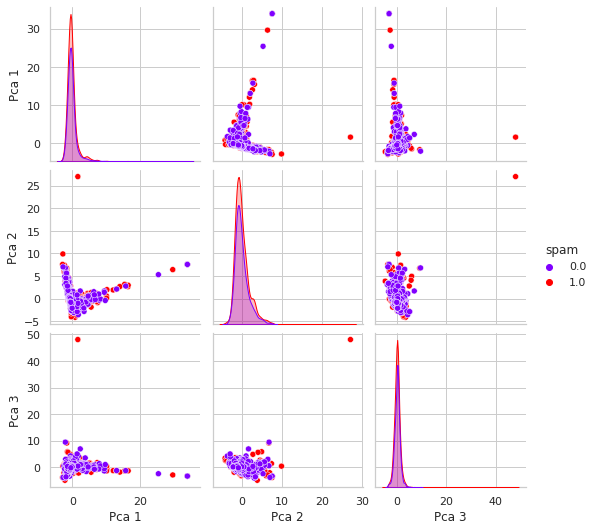

In [ ]:
import seaborn as sns
sns.set(style="ticks")
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(X_train_pca, hue='spam', palette='rainbow')

### Using kernel = poly with degree = 2 (Quadratic) for finding the best fit line for best accuracy

In [ ]:
C_vals_quad = []
scores_quad = []
for C in range(1, 100):
    clf = SVC(kernel='poly', degree = 2, C = C)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    score = accuracy_score(y_test, preds)
    scores_quad.append(score)
    C_vals_quad.append(C)

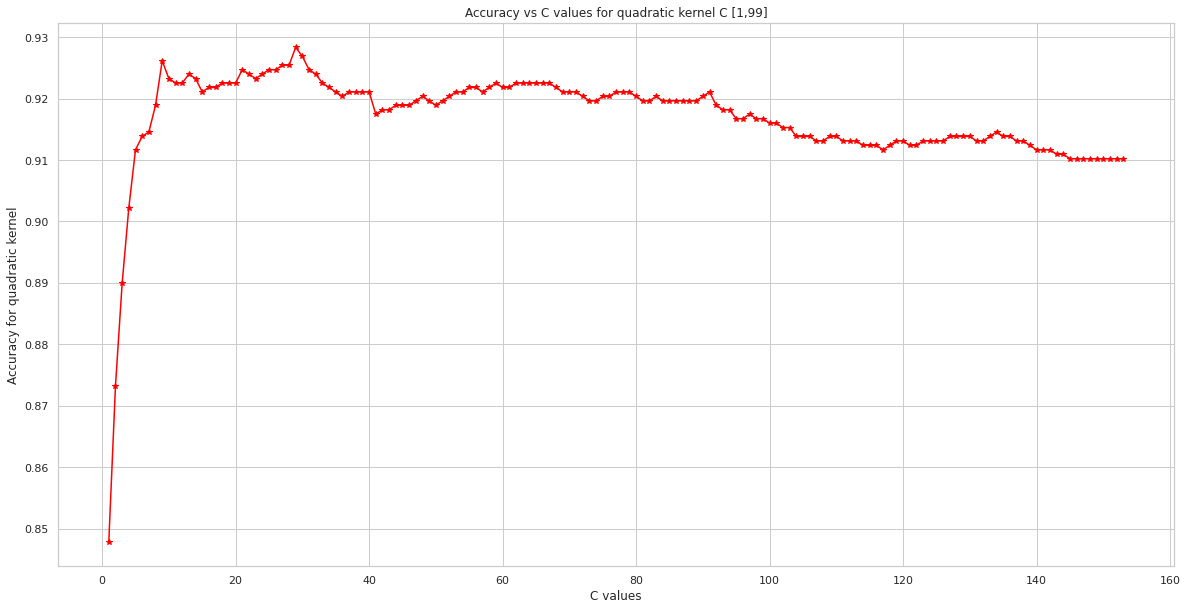

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracy vs C values for quadratic kernel C [1,99]')
plt.xlabel('C values')
plt.ylabel('Accuracy for quadratic kernel')
plt.plot(C_vals_quad, scores_quad, marker='*', c = 'red')
plt.show()

In [ ]:
max_quad = scores_quad.index(max(scores_quad))
C_quad_max = C_vals_quad[max_quad]
print('The best C value for quadratic kernel is:', C_quad_max, "with accuracy:", max(scores_quad))

The best C value for quadratic kernel is: 29 with accuracy: 0.9283128167994207


### Using kernel = rbf (Radial Basis function) for finding the best fit line for best accuracy

In [ ]:
C_vals_rbf = []
scores_rbf = []
for C in range(1, 100):
    clf = SVC(kernel='rbf', C = C)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    score = accuracy_score(y_test, preds)
    scores_rbf.append(score)
    C_vals_rbf.append(C)

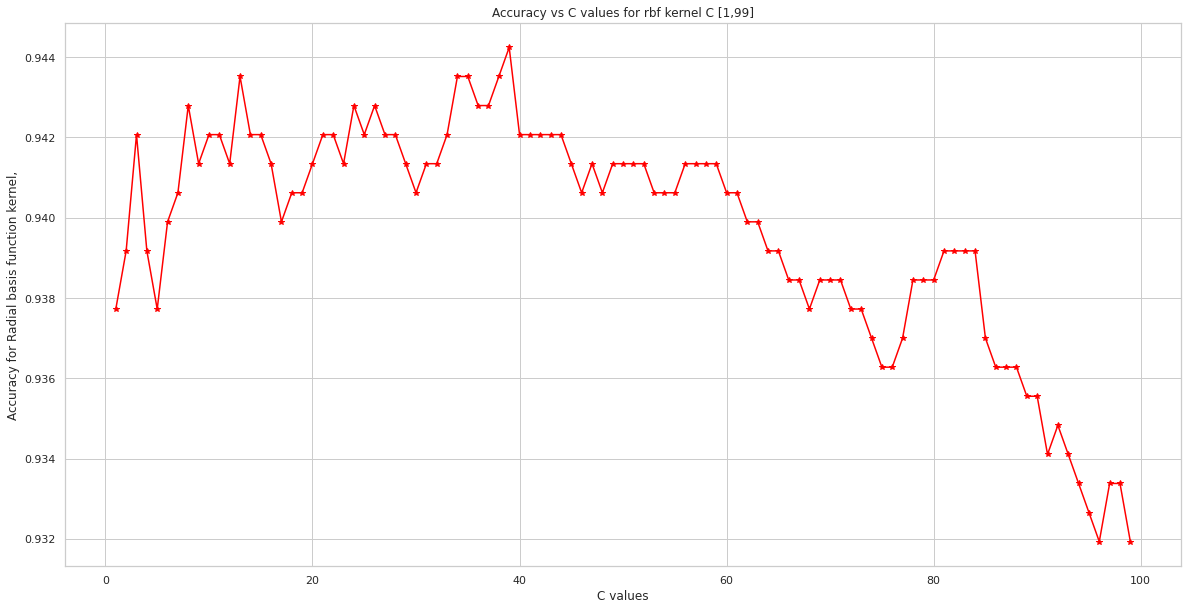

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracy vs C values for rbf kernel C [1,99]')
plt.xlabel('C values')
plt.ylabel('Accuracy for Radial basis function kernel,')
plt.plot(C_vals_rbf, scores_rbf, marker='*', c = 'red')
plt.show()

In [ ]:
max_rbf = scores_rbf.index(max(scores_rbf))
C_rbf_max = C_vals_rbf[max_rbf]
print('The best C value for rbf kernel is:', C_rbf_max, "with accuracy:", max(scores_rbf))

The best C value for rbf kernel is: 39 with accuracy: 0.944243301955105


### Using kernel = linear for finding the best fit line for best accuracy

In [ ]:
C_vals_lin = []
scores_lin = []
for C in range(1, 100):
    clf = SVC(kernel='linear', C = C)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    score = accuracy_score(y_test, preds)
    scores_lin.append(score)
    C_vals_lin.append(C)

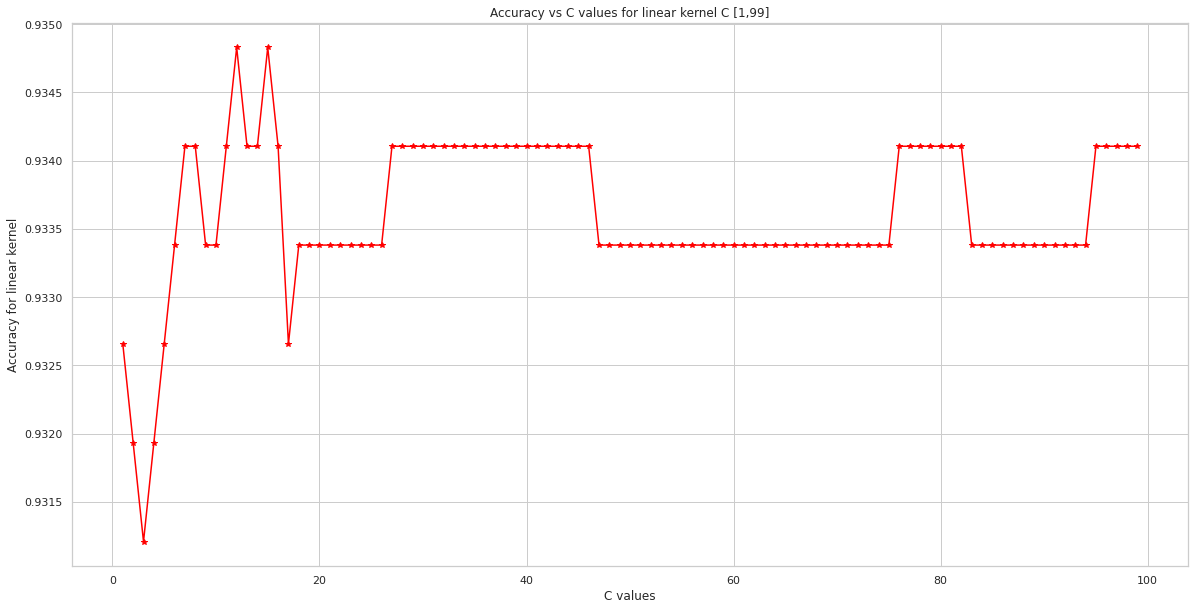

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracy vs C values for linear kernel C [1,99]')
plt.xlabel('C values')
plt.ylabel('Accuracy for linear kernel')
plt.plot(C_vals_lin, scores_lin, marker='*', c = 'red')
plt.show()

In [ ]:
max_lin = scores_lin.index(max(scores_lin))
C_lin_max = C_vals_lin[max_lin]
print('The best C value for linear kernel is:', C_lin_max, "with accuracy:", max(scores_lin))

The best C value for linear kernel is: 12 with accuracy: 0.9348298334540188


### Creating a comparison table for the accuracies obtained from above three methods

In [ ]:
def comparisonTable(C_lin_max, C_quad_max, C_rbf_max, max_lin, max_quad, max_rbf):
    d_table = pd.DataFrame({'Kernel': ['Linear', 'Quadratic', 'rbf'],
                    'C': [C_lin_max, C_quad_max, C_rbf_max],
                    'Accuracy': [max_lin, max_quad, max_rbf]})

    return d_table              

table = comparisonTable(C_lin_max, C_quad_max, C_rbf_max, max(scores_lin), max(scores_quad), max(scores_rbf))
table

,Kernel,C,Accuracy
0,Linear,12,0.934830
1,Quadratic,29,0.928313
2,rbf,39,0.944243
